1. collected data of Reliance Industries Limited Stock Price from year 1990 to 2023.
2. For the Closing Price and Volume, make a forecast for the next 5 years, i.e. from 2024 to 2029.
3. Also find the factors that influence the stock prices and any special events during this period.
4. Using Streamlit, deploy the model with the best accuracy.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/reliance_dataset_bse.csv')
df['Date']= pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
1991-01-02,115.0,115.0,105.00,107.50,0.0,0,0,0.0,NaN,NaN,10.00,-7.50
1991-01-03,107.5,107.5,95.00,97.50,0.0,0,0,0.0,NaN,NaN,12.50,-10.00
1991-01-07,105.0,107.5,97.50,105.00,0.0,0,0,0.0,NaN,NaN,10.00,0.00
1991-01-09,105.0,105.0,101.25,102.50,0.0,0,0,0.0,NaN,NaN,3.75,-2.50
1991-01-11,102.5,110.0,100.00,108.75,0.0,0,0,0.0,NaN,NaN,10.00,6.25


In [ ]:
df = df[['Close Price','No.of Shares']]
df.columns = ['Close','Volume']

In [ ]:
df.tail()

,Close,Volume
Date,,
2023-12-22,2564.70,524558
2023-12-26,2577.50,90284
2023-12-27,2586.35,103806
2023-12-28,2605.80,183810
2023-12-29,2584.85,848448


# model creation

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2029-12-31')

days_diff = (end_date - start_date).days

days_diff

2191

In [ ]:
# Fit ARIMA model
from pmdarima import auto_arima
# model = auto_arima(df['Close_price'], seasonal=False, stepwise=True, trace=True)
# print(model.summary())

# Use auto_arima to determine the best ARIMA parameters
model = auto_arima(train_data, start_p=0, start_q=0,
                   max_p=3, max_q=3, seasonal=False,
                   stepwise=True, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   max_d=2)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60749.613, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60742.539, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=60742.588, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60747.793, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=60744.534, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=60744.538, Time=1.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=60746.531, Time=4.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=60740.706, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=60742.701, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=60742.705, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=60740.755, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=60744.697, Time=1.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 10.573 seconds
                               SARIMAX Results                             

6469

In [ ]:
train_data = df['Close'][:6469]
test_data = df['Close'][6469:]

In [ ]:
forecast,conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
new_df = pd.DataFrame({'Forecast': forecast.values,'actual': test_data.values})
new_df.head()

,Forecast,actual
0,1033.798714,1025.70
1,1033.800540,1015.95
2,1033.800608,1027.55
3,1033.800611,1016.70
4,1033.800611,1025.15


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data.values, forecast.values)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 743.0417077387955


In [ ]:
# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start='2024-01-01', periods=2191, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast.values, 'Lower CI': conf_int[:, 0], 'Upper CI': conf_int[:, 1]}, index=forecast_dates)
print(forecast_df.head())

               Forecast     Lower CI     Upper CI
2024-01-01  2505.348594  2448.430687  2562.266501
2024-01-02  2503.700035  2421.691681  2585.708389
2024-01-03  2507.640421  2406.764054  2608.516789
2024-01-04  2513.714205  2398.012900  2629.415511
2024-01-05  2517.819373  2389.964827  2645.673919


In [ ]:
df_close = df['Close']
forecast_close= forecast_df['Forecast']
df_final_close = pd.concat([df_close, forecast_close])
df_final_close.head()

1991-05-03    130.0
1991-05-06    127.0
1991-05-07    127.0
1991-05-08    128.0
1991-05-09    127.0
dtype: float64

<Axes: >

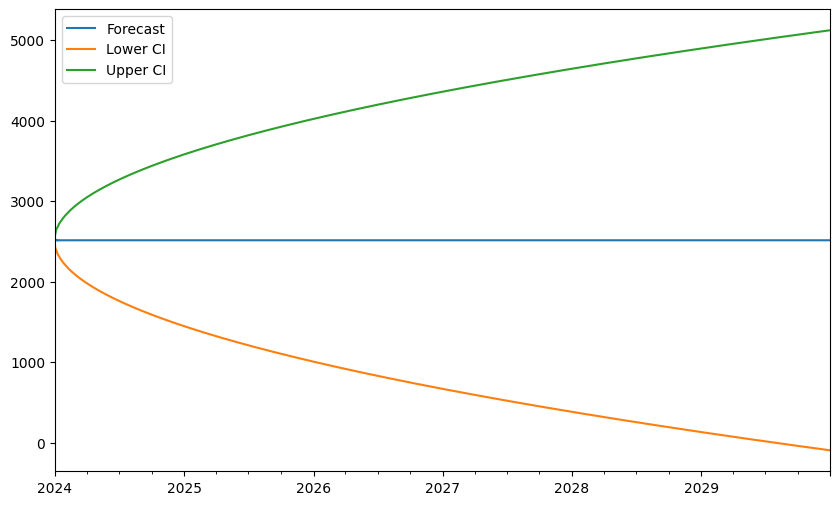

In [ ]:
forecast_df.plot(figsize=(10, 6))

# linear regression

In [ ]:
df.tail()

,Close,Volume
Date,,
2023-12-22,2564.70,524558
2023-12-26,2577.50,90284
2023-12-27,2586.35,103806
2023-12-28,2605.80,183810
2023-12-29,2584.85,848448


In [ ]:
df.columns

Index(['Close', 'Volume'], dtype='object')

MAE: 351.3764188256689
MSE: 219784.12408480002
RMSE: 468.8113950031505
R²: 0.5942790295360572


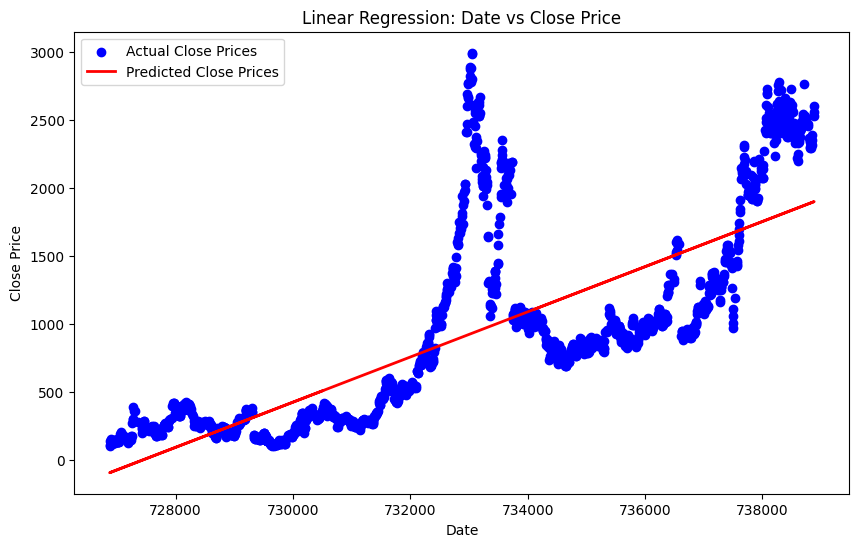

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Convert index (date) to numerical format
df['Date_Num'] = df.index.map(pd.Timestamp.toordinal)

# Define features and target
X = df[['Date_Num']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression: Date vs Close Price')
plt.legend()
plt.show()


In [ ]:
pd.Timestamp.toordinal(pd.to_datetime('2025-03-02'))

739312

In [ ]:
# Create future dates from 2024 to 2029 on a daily basis
future_dates = pd.date_range(start='2024-01-01', end='2029-12-31', freq='D')
future_dates_num = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predict the stock prices for the future dates
future_pred = model.predict(future_dates_num)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# saving the model
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

# for opening the model
# Load the model
#model = joblib.load('linear_regression_model.pkl')

['linear_regression_model.pkl']

In [ ]:
forecast_df = pd.DataFrame({'Date':future_dates,'Close':future_pred})
forecast_df.head()

forecast_df.index = forecast_df['Date']
forecast_df.drop('Date', axis=1, inplace=True)
forecast_df.head()

,Close
Date,
2024-01-01,1902.346891
2024-01-02,1902.512929
2024-01-03,1902.678966
2024-01-04,1902.845004
2024-01-05,1903.011041


<Axes: xlabel='Date'>

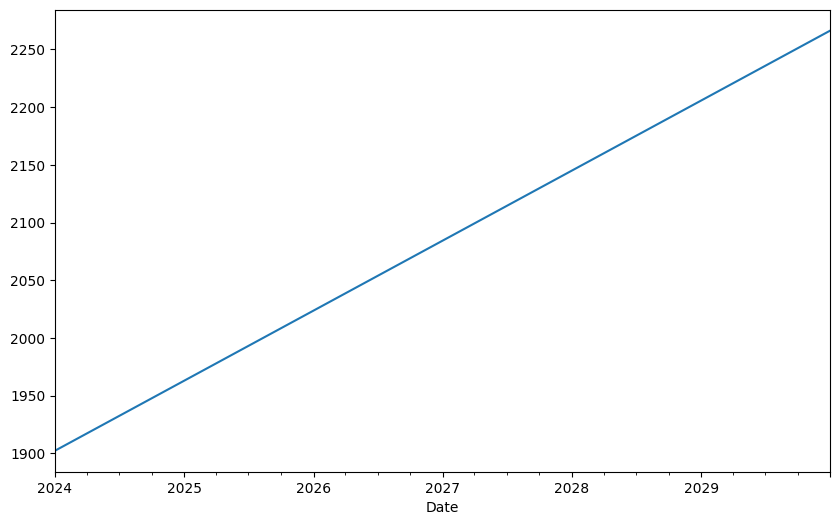

In [ ]:
forecast_df['Close'].plot(figsize=(10, 6))

<Axes: xlabel='Date'>

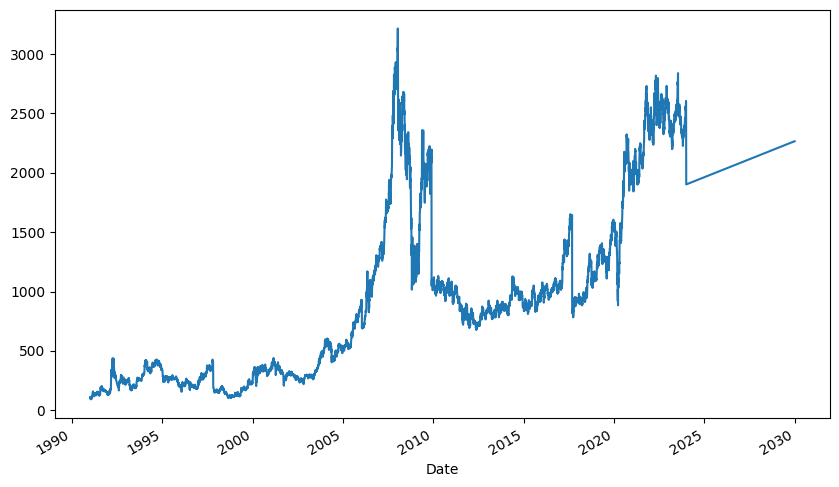

In [ ]:
final_df = pd.concat([df, forecast_df])
final_df['Close'].plot(figsize=(10, 6))

In [ ]:
final_df.tail()

,Close,Volume,Date_Num,Ordinal_values
Date,,,,
2029-12-27,2265.470883,NaN,NaN,NaN
2029-12-28,2265.636921,NaN,NaN,NaN
2029-12-29,2265.802958,NaN,NaN,NaN
2029-12-30,2265.968996,NaN,NaN,NaN
2029-12-31,2266.135033,NaN,NaN,NaN


<Axes: xlabel='Date'>

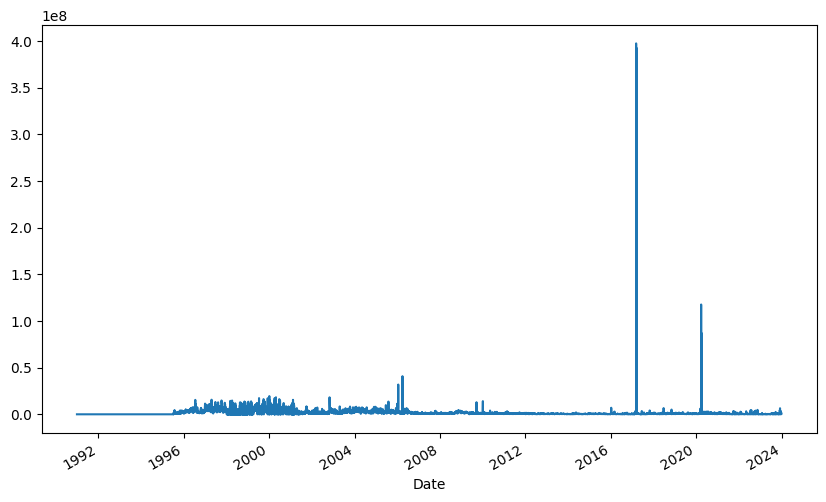

In [ ]:
# predicting volume
df['Volume'].plot(figsize=(10, 6))


MAE: 1550365.4494971982
MSE: 5150444614790.551
RMSE: 2269459.1018105065
R²: 0.08101798471237365


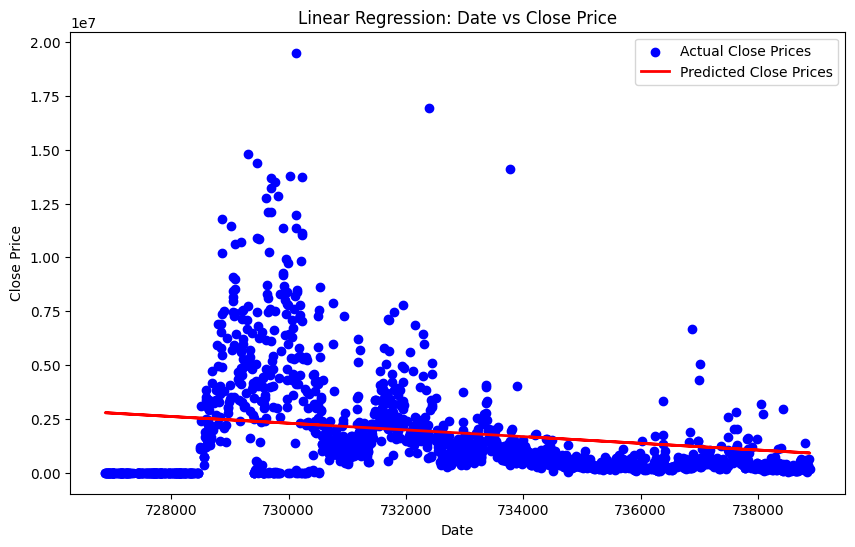

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Convert index (date) to numerical format
df['Date_Num'] = df.index.map(pd.Timestamp.toordinal)

# Define features and target
X = df[['Date_Num']]
y = df['Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression: Date vs Close Price')
plt.legend()
plt.show()

In [ ]:
# Create future dates from 2024 to 2029 on a daily basis
future_dates = pd.date_range(start='2024-01-01', end='2029-12-31', freq='D')
future_dates_num = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predict the stock prices for the future dates
future_pred = model.predict(future_dates_num)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
forecast_df['Volume'] = future_pred
forecast_df.head()

,Close,Volume
Date,,
2024-01-01,1902.346891,915184.653303
2024-01-02,1902.512929,915028.894598
2024-01-03,1902.678966,914873.135893
2024-01-04,1902.845004,914717.377188
2024-01-05,1903.011041,914561.618483


In [ ]:
# saving the model
import joblib
joblib.dump(model, 'linear_regression_model(volume).pkl')

['linear_regression_model(volume).pkl']

In [ ]:
predicted_df = pd.concat([df, forecast_df])
predicted_df.tail()

,Close,Volume,Date_Num,Ordinal_values
Date,,,,
2029-12-27,2265.470883,574540.365426,NaN,NaN
2029-12-28,2265.636921,574384.606721,NaN,NaN
2029-12-29,2265.802958,574228.848016,NaN,NaN
2029-12-30,2265.968996,574073.089311,NaN,NaN
2029-12-31,2266.135033,573917.330606,NaN,NaN


In [ ]:
predicted_df = predicted_df.drop(['Date_Num','Ordinal_values'],axis=1)

In [ ]:
predicted_df.to_csv('predicted_1991-2029.csv')

# Multi-Layer Perceptron MLP Regressor

MAE: 669.0738850377803
MSE: 600456.2878239325
RMSE: 774.8911457901248
R²: -0.10844087957466253


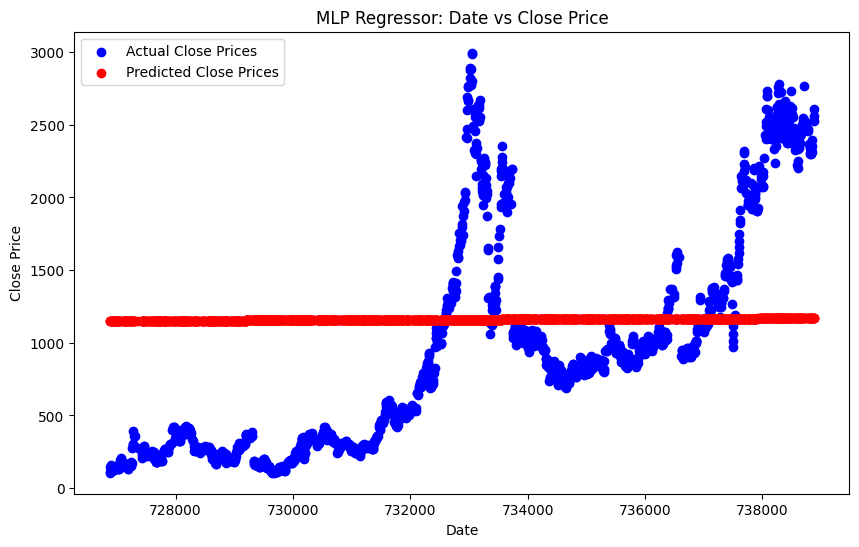

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Convert index (date) to numerical format
df['Date_Num'] = df.index.map(pd.Timestamp.toordinal)

# Define features and target
X = df[['Date_Num']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('MLP Regressor: Date vs Close Price')
plt.legend()
plt.show()


# Keras

Epoch 1/100
660/660 [==============================] - 2s 2ms/step - loss: 385976416.0000
Epoch 2/100
660/660 [==============================] - 2s 2ms/step - loss: 547544.7500
Epoch 3/100
660/660 [==============================] - 2s 2ms/step - loss: 572847.6875
Epoch 4/100
660/660 [==============================] - 2s 2ms/step - loss: 582659.1875
Epoch 5/100
660/660 [==============================] - 2s 2ms/step - loss: 614716.2500
Epoch 6/100
660/660 [==============================] - 2s 3ms/step - loss: 614757.8750
Epoch 7/100
660/660 [==============================] - 3s 5ms/step - loss: 652200.7500
Epoch 8/100
660/660 [==============================] - 2s 3ms/step - loss: 717393.3750
Epoch 9/100
660/660 [==============================] - 2s 2ms/step - loss: 770665.7500
Epoch 10/100
660/660 [==============================] - 1s 2ms/step - loss: 822246.8750
Epoch 11/100
660/660 [==============================] - 2s 2ms/step - loss: 888516.1875
Epoch 12/100
660/660 [================

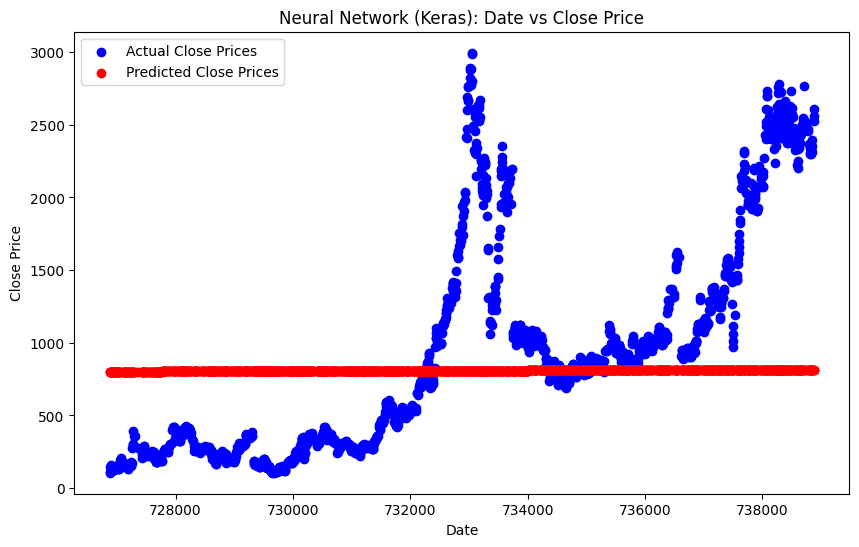

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Convert index (date) to numerical format
df['Date_Num'] = df.index.map(pd.Timestamp.toordinal)

# Define features and target
X = df[['Date_Num']].values
y = df['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Neural Network (Keras): Date vs Close Price')
plt.legend()
plt.show()


# Decision Tree Regressor

MAE: 13.820515151515155
MSE: 642.5938409090915
RMSE: 25.349434725632275
R²: 0.9988137732976237


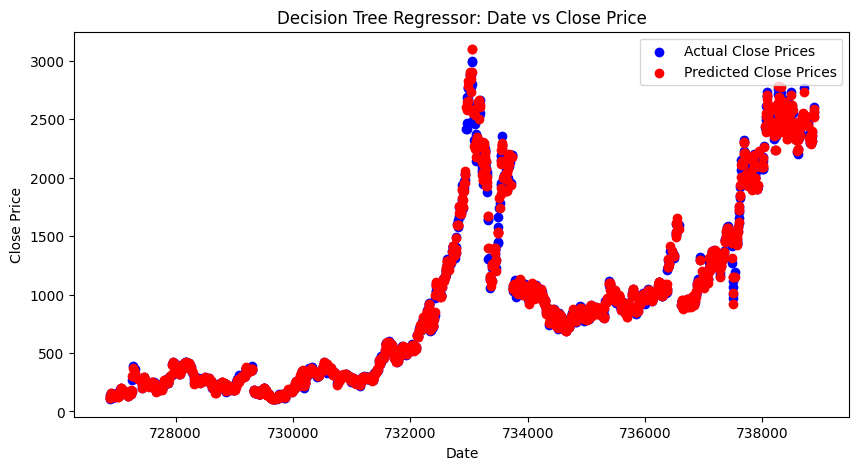

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Convert index (date) to numerical format
df['Date_Num'] = df.index.map(pd.Timestamp.toordinal)

# Define features and target
X = df[['Date_Num']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Decision Tree Regressor: Date vs Close Price')
plt.legend()
plt.show()


In [ ]:
dt.predict([[740713]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2584.85])

In [ ]:
X_test

,Date_Num
Date,
2010-12-08,734114
2020-08-14,737651
1994-11-24,728256
2004-12-23,731938
2007-08-16,732904
...,...
1998-01-14,729403
2008-01-17,733058
1999-04-15,729859


# Random Forest Regressor

MAE: 12.255178177489114
MSE: 603.2045312510689
RMSE: 24.560222540748057
R²: 0.9988864858695935


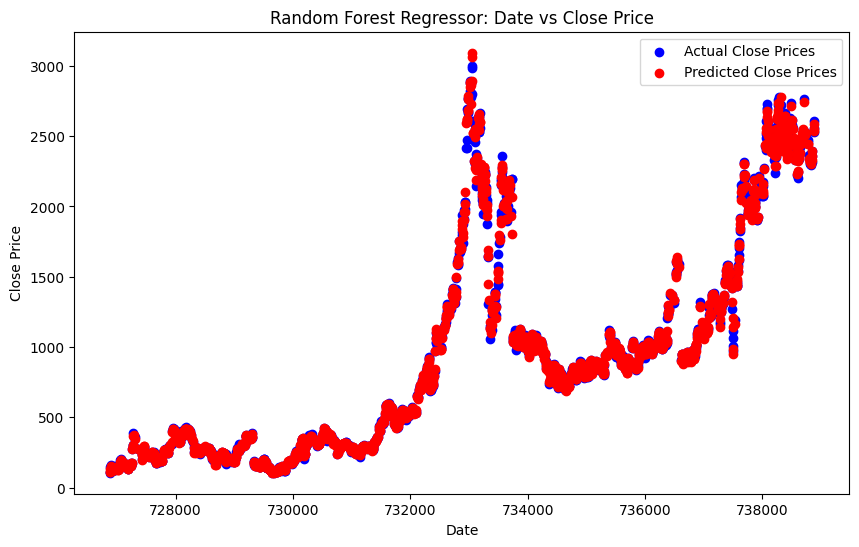

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Convert index (date) to numerical format
df['Date_Num'] = df.index.map(pd.Timestamp.toordinal)

# Define features and target
X = df[['Date_Num']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Random Forest Regressor: Date vs Close Price')
plt.legend()
plt.show()


# xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Prepare features and target
df['Date_ordinal'] = df.index.map(pd.Timestamp.toordinal)
X = df[['Date_ordinal']].values
y = df['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgbr = xgb.XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_xgbr = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgbr.predict(X_test)

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
RMSE: 64.48842201536539
